In [446]:
%matplotlib inline

In [447]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from numpy import linalg as LA
from sklearn.cluster import KMeans

In [448]:
iris = datasets.load_iris()

In [449]:
data1 = pd.DataFrame(data= np.c_[iris['data']], columns= iris['feature_names'])

In [450]:
df = pd.DataFrame(iris.target)

In [451]:
#plt.scatter(data1[:, 0], data1[:, 1] , s = iris.)

In [452]:
#test = data1.drop([int(i) for i in range(90)])
#train = data1[:90]

In [501]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [453]:
similarity = np.zeros((150,150))

In [513]:
sigma = 0.08

In [514]:
for i in range(150):
    for j in range(i,150):
        if (i != j):
            a = np.exp(-1* (pow((data1.loc[i,'sepal length (cm)'] - data1.loc[j,'sepal length (cm)']),2) + 
                            pow((data1.loc[i,'sepal width (cm)'] - data1.loc[j,'sepal width (cm)']) , 2) + 
                            pow((data1.loc[i,'petal length (cm)'] - data1.loc[j,'petal length (cm)']) , 2) + 
                            pow((data1.loc[i,'petal width (cm)'] - data1.loc[j,'petal width (cm)']) , 2)) 
                       // (2 * pow(sigma,2)))
        similarity[i][j] = a
        similarity[j][i] = a

In [515]:
D = np.zeros((150,150))

In [516]:
for i in range(150):
    sum = 0
    for j in range(150):
        sum += similarity[i,j]
    D[i,i] = sum

In [517]:
L = np.zeros((150,150))

In [518]:
for i in range(150):
    for j in range(150):
        L[i,j] = D[i,j] - similarity[i,j]

In [519]:
w, v = LA.eigh(L)

In [520]:
k = 3

In [521]:
for i in range(1 , 150 - k + 1):
    v = np.delete(v,150 - i,1)

In [522]:
kmeans = KMeans(n_clusters=k).fit(v)

In [523]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [524]:
kmeans.cluster_centers_

array([[ 3.46944695e-17,  1.00498652e-01,  1.56784514e-03],
       [-1.41421334e-01, -4.16333634e-17,  0.00000000e+00],
       [ 0.00000000e+00, -4.40407753e-05, -6.98641761e-01]])

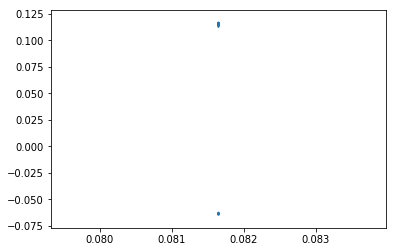

In [466]:
plt.scatter(v[:, 0], v[:, 1], s=kmeans.labels_)